# Decision Tree    

<img style="float: left;" width="400" src="images/DT_example.png">

* Decision Tree learning (DT) is a supervised learning method mostly used to model categorical variables (classification problems).

* The tree representation consists in a structure containint nodes, branches and leaves.

    * The nodes are the conditional elements, where the next element is chosen depending on the input value
    * The branches are the connections between nodes (or nodes and leaves)
    * Leaves represent the final classification classes
    * The path to reach a leaf is called classification rule
 

* Because of its simplicity, a tree diagram can be used in a broad range of applications and disciplines including civil planning, energy, financial, engineering, healthcare, pharmaceutical, education, law, and business.



## Entropy

* Entropy carachterize the organization of an example colection:

    * Given a set $S$, containing positive and negative values for the target variable (i.e. binary), $Entropy$ is given by:

\begin{equation} Entropy(S) = -p_{+}\log_{2}p_{+}-p_{-}\log_{2}p_{-} \end{equation}

where $p_+$ is the ratio of examples labeled as positive and $p_-$ as negative.

* note: for the calculations envolving entropy, $0 \cdot log_2(0)$ is assumed as 0.

* From the equation above, $Entropy$ is 0 when all elements of $S$ are from the same class and 1 when it contains an equal number of negative and positive examples.

* Remark: the sum of $p_+$ and $p_-$ will always be 1

    * Therefore, $p_- = 1 - p_+$

\begin{equation} Entropy(S) = -p_{+}\log_{2}p_{+}-(1 - p_{+})\log_{2}(1 - p_{+}) \end{equation}


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log2
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


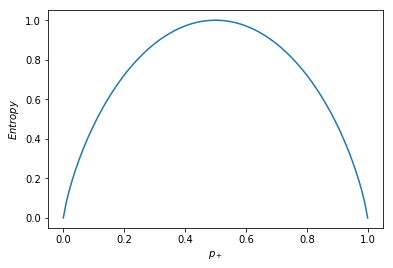

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

p_plus = np.linspace(0, 1, 100)
p_plus
p_minus = 1 - p_plus
entropy = - p_plus * np.log2(p_plus) - p_minus * np.log2(p_minus)
entropy = np.nan_to_num(entropy) # to fill the zero divisions by 0

plt.xlabel(r'$p_+$')
plt.ylabel(r'$Entropy$')
plt.plot(p_plus, entropy)


Generalizando o cálculo da entropia para casos em que o atributo-objetivo possui mais que dois valores possíveis, define-se a entropia como:

* Generalizing entropy for multiple classes:

\begin{equation}
\label{entropy_generalized}
Entropy(S) = \sum_{i=1}^{c}-p_{i}\log_{2}p_{i}
\end{equation}

where $p_{i}$ is the proportion of elements from S corresponding to the class $i$ and $c$ is the total number of classes.

* **Classification tree algorithms build an tree decision model that order the test attributes in order to minimize entropy**
* The smaller the entropy the more organized are the groups of examples

In [8]:
def entropy(s):
    #s is a pandas series
    entropy = 0
    for i in s.unique():
        pi = float((s == i).sum())/len(s) #proportion of s belonging to class i
        entropy = entropy - pi*log(pi,2)
    return entropy

class Tree(object):
    def __init__(self, arg):
        self.root = None
        self.label = None
        self.branches = []

    def add_branch(self):
        self.branches.append(Tree())

    def define_label(self, label):
        self.label = label

def ID3(examples, target_attributes, attributes):

    tree = Tree()
    if all(examples > 0):
        tree.define_label('+')
        return tree
    if all(examples < 0):
        tree.define_label('-')
        return tree

## Iris dataset

* This data sets consists of 3 different types of irises’ petal and sepal length
* Introduced by the British statistician and biologist Ronald Fisher in his 1936 paper *"The use of multiple measurements in taxonomic problem"*
* Dimension: 150x4 numpy.ndarray
* Features: Sepal Length, Sepal Width, Petal Length and Petal Width.
* Output: Iris type (Setosa, Versicolour, and Virginica)

In [9]:
import sklearn.datasets
iris = sklearn.datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['type'] = iris.target

df.sample(10) #sample 10 random rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),type
10,5.4,3.7,1.5,0.2,0
48,5.3,3.7,1.5,0.2,0
105,7.6,3.0,6.6,2.1,2
55,5.7,2.8,4.5,1.3,1
46,5.1,3.8,1.6,0.2,0
99,5.7,2.8,4.1,1.3,1
35,5.0,3.2,1.2,0.2,0
27,5.2,3.5,1.5,0.2,0
75,6.6,3.0,4.4,1.4,1
138,6.0,3.0,4.8,1.8,2
